In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov7-SI
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/yolov7-SI
cfg	   hubconf.py	README.md	      tools	       yolov7-SI.ipynb
data	   inference	requirements_gpu.txt  traced_model.pt  yolov7x.pt
deploy	   LICENSE.md	requirements.txt      train_aux.py
detect.py  models	runs		      train.py
export.py  paper	scripts		      utils
figure	   __pycache__	test.py		      yolov7.pt


In [2]:
%pip install -qr requirements.txt # install dependencies
%pip install -qr requirements_gpu.txt # install dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.6/1.6 GB 19.0 MB/s eta 0:00:01tcmalloc: large alloc 1636999168 bytes == 0x2d44000 @  0x7f27b90aa680 0x7f27b90cb824 0x5b3128 0x5bbc90 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f60c3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.6/1.6 GB 16.7 MB/s eta 0:00:01tcmalloc: large alloc 2046255104 bytes == 0x6466e000 @  0x7f27b90aa680 0x7f27b90cada2 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a
tcmalloc: large alloc 1636999168 bytes == 0x2d44000 @  0x7f27b90aa680 0x

In [3]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Setup complete. Using torch 1.11.0+cu113 (Tesla T4)


In [ ]:
!python train.py --workers 8 --device 0 --batch-size 32 --epochs 300 --img 416 416 --hyp data/hyp.scratch.custom.yaml --name e2x --weights yolov7x.pt

YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15109.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=32, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='data/coco.yaml', device='0', entity=None, epochs=300, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='e2x', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/e2x', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=32, upload_dataset=False, v5_metric=False, weights='yolov7x.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, 

In [8]:
!python train.py --resume runs/train/e3s/weights/last.pt # automatically find latest checkpoint (searches yolov7/ directory)

Resuming training from runs/train/e3s/weights/last.pt
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15109.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=32, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='data/coco.yaml', device='0', entity=None, epochs=300, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='e3s', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=True, save_dir='runs/train/e3s', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=32, upload_dataset=False, v5_metric=False, weights='runs/train/e3s/weights/last.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.000

In [11]:
!python test.py --weights runs/train/e3s/weights/last.pt --img 416 --iou 0.5 --conf 0.409 --device 0 --name e3s_testing

Namespace(augment=False, batch_size=32, conf_thres=0.409, data='data/coco.yaml', device='0', exist_ok=False, img_size=416, iou_thres=0.5, name='e3s_testing', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=True, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['runs/train/e3s/weights/last.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.8/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36479926 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img-size 416 --conf 0.5 --source test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-217-ga625f29 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
101 436 826 682 Instrument
1327 632 1740 915 Instrument
image 1/2 /content/gdrive/MyDrive/yolov5-SI/test/images/test1.jpg: 256x416 2 Instruments, 21.6ms
1186 112 1540 366 Instrument
130 497 879 1022 Instrument
937 409 1771 892 Instrument
image 2/2 /content/gdrive/MyDrive/yolov5-SI/test/images/test2.jpg: 256x416 3 Instruments, 21.5ms
Speed: 0.4ms pre-pr

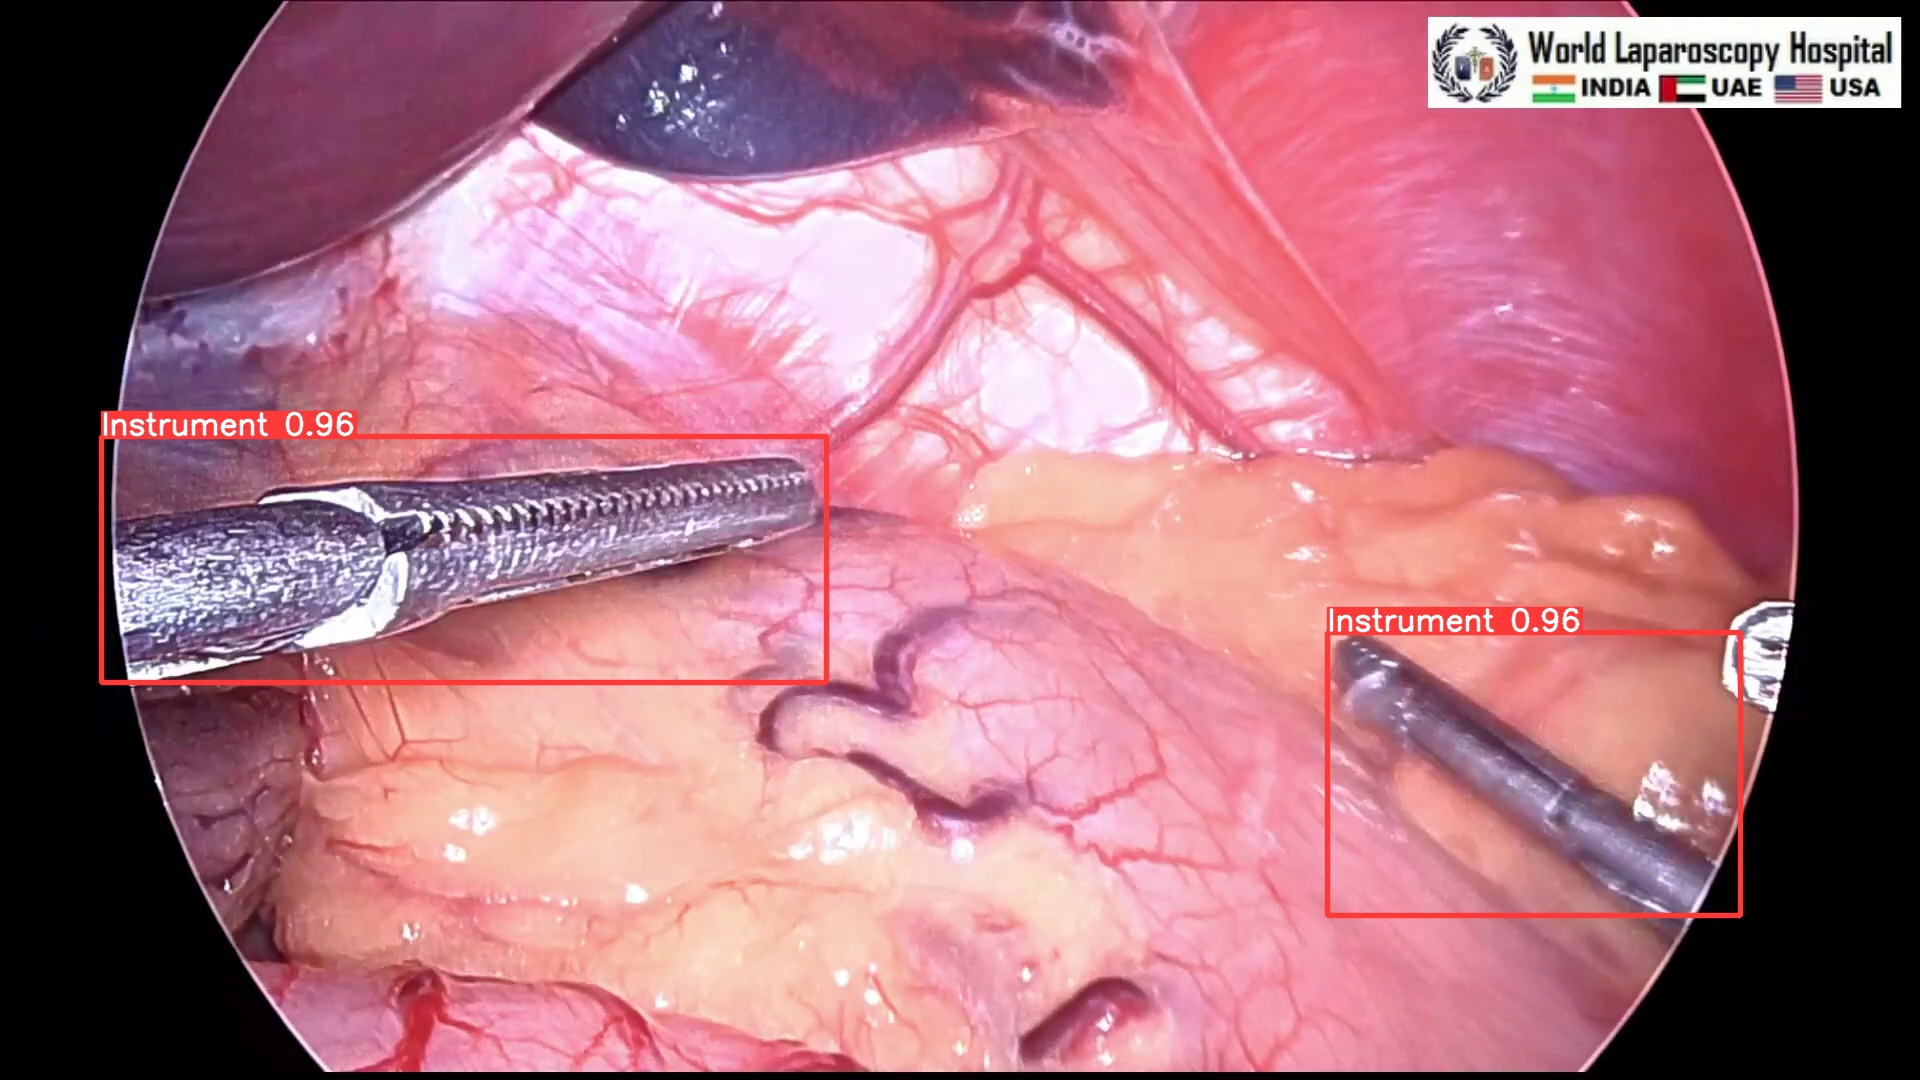

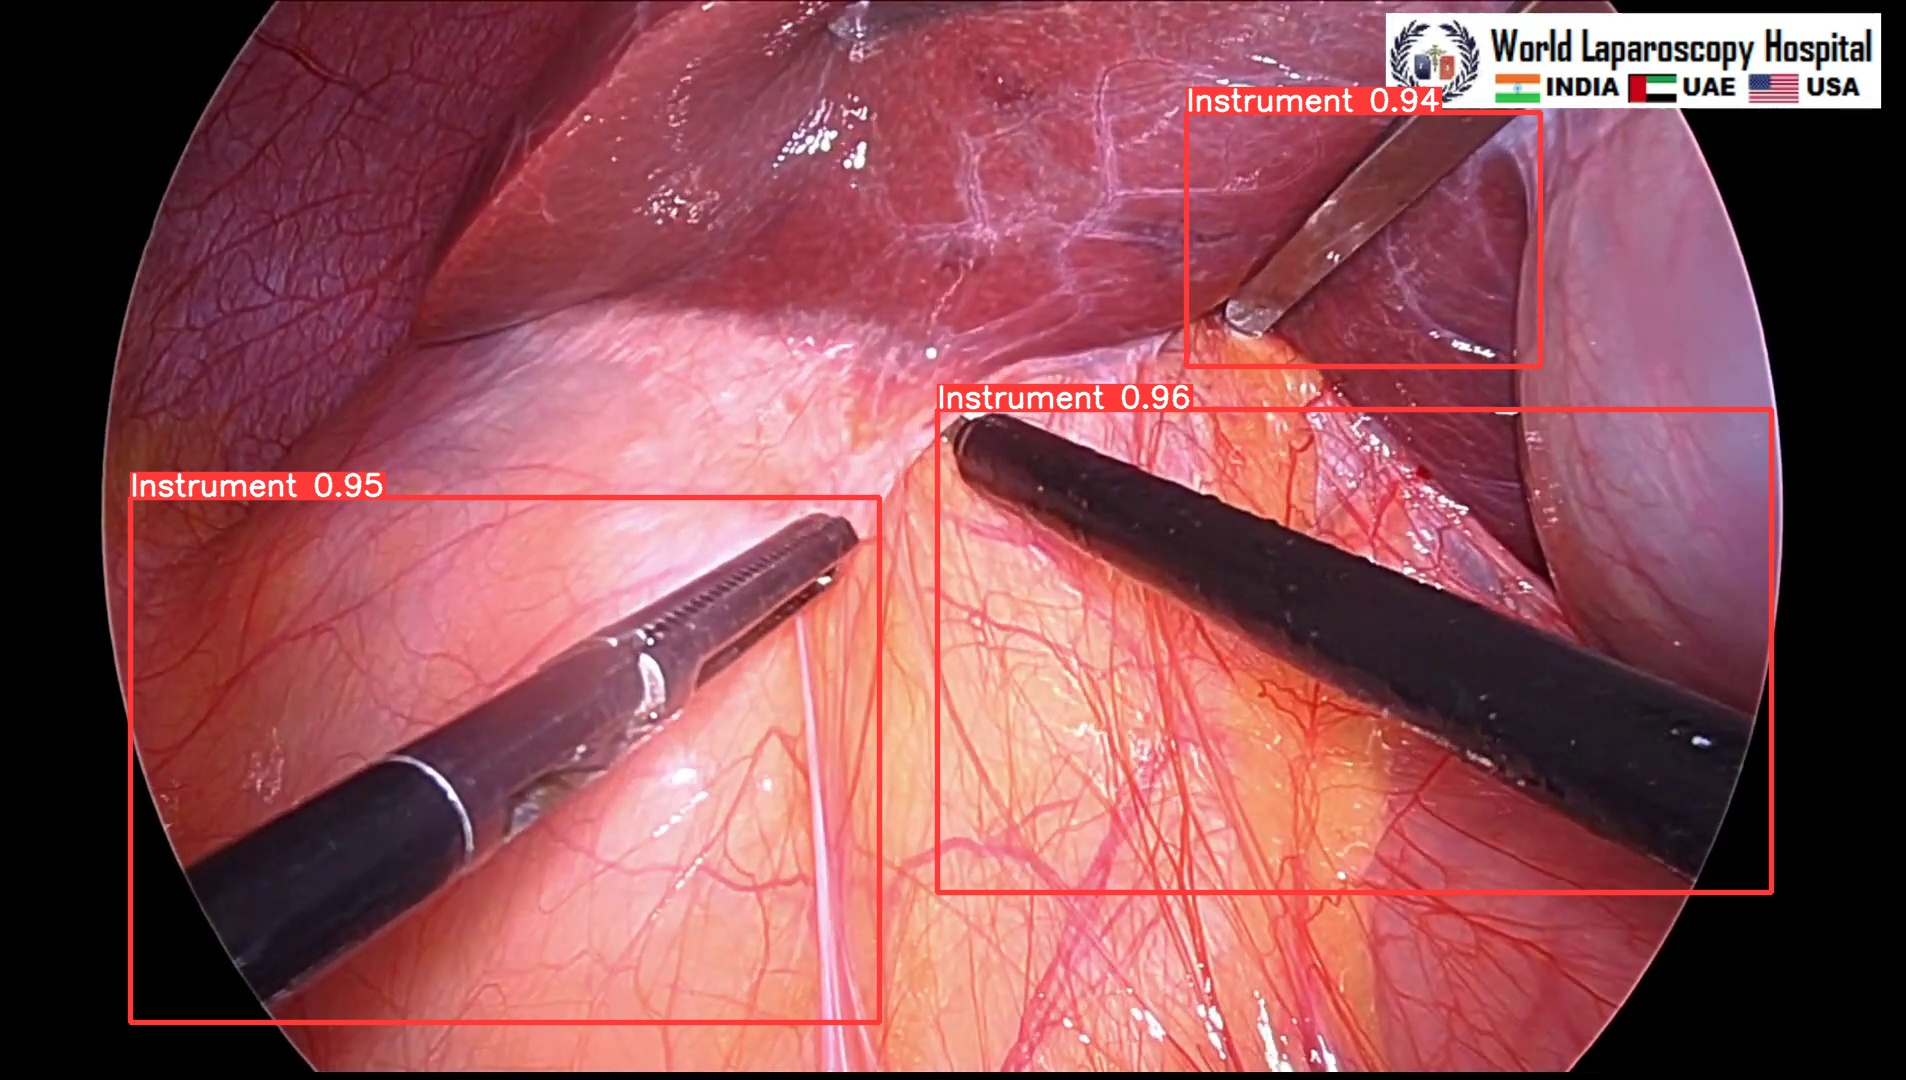

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")